In [ ]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
import pandas as pd

In [ ]:
df = pd.read_csv("/content/WT_APP_core_clock.csv")
df

,genenames,Astrocyte,Microglia,Bulk,treatment
0,Ciart,17.0,18.0,17.0,0
1,Arntl,6.0,5.0,6.0,0
2,Cry1,0.0,23.0,NaN,0
3,Per2,NaN,22.0,22.0,0
4,Dbp,17.0,18.0,16.0,0
5,Ciart,18.0,16.0,17.0,1
6,Arntl,NaN,6.0,6.0,1
7,Cry1,22.0,NaN,NaN,1
8,Per2,NaN,22.0,22.0,1
9,Dbp,17.0,15.0,16.0,1


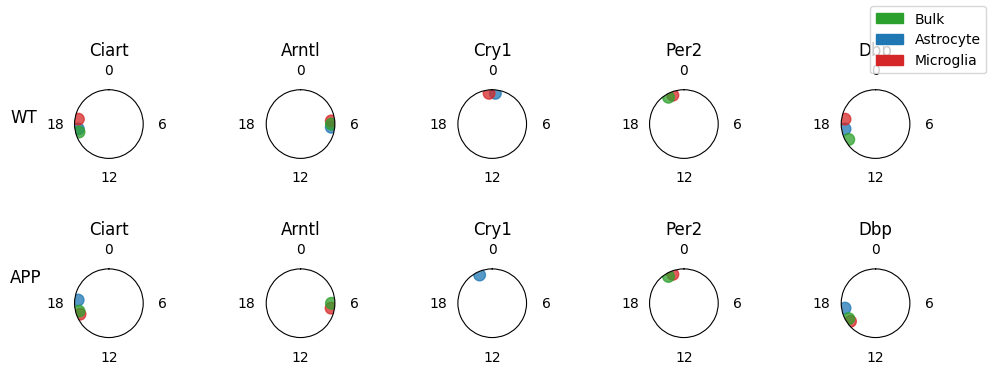

In [ ]:
import itertools
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

f, axes = plt.subplots(2, 5,figsize = (10, 4), subplot_kw=dict(projection="polar"))
colors = {'Astrocyte':'tab:blue', 'Microglia':'tab:red', 'Bulk':'tab:green'}
np.random.seed(1)

#generate array of 8 values that follow normal distribution with mean=5 and sd=2
jitter =  np.random.rayleigh(scale=.1, size=3)
row = 0

for i in range(df.shape[0]):
    col = i
    if (i > 4):
      row = 1
      col = i % 5
    angles = df.iloc[i, 1:4]*pi/12 + jitter #convert to radians and add jitter
    scatter = axes[row, col].scatter(angles, np.ones(3)*1-.1, c = df.columns[1:4].map(colors), alpha = 0.75, s = 70)
    plt.setp(axes[row, col].get_yticklabels(), visible=False)

    axes[row, col].set_title(df.iloc[i, 0])
    axes[row, col].set_ylim(0, 1)
    axes[row, col].set_xticks(np.linspace(0, 2*pi, 4, endpoint=False))
    axes[row, col].set_xticklabels([0, 6 ,12, 18])

    # make the labels go clockwise
    axes[row, col].set_theta_direction(-1)

    # place 0 at the top
    axes[row, col].set_theta_offset(pi/2.0)
    #axes[i].bar(angles, np.full(3, 0.9), width=0.05, bottom=0.2, linewidth=3)
    axes[row, col].grid(visible = False)
    # produce a legend with the unique colors from the scatter
    # legend1 = axes[i].legend(*scatter.legend_elements(),
                    # loc="lower left", title="Classes")
    # axes[i].add_artist(legend1)

f.tight_layout(pad=3.0)

red_patch = mpatches.Patch(color='tab:red', label='Microglia')
green_patch = mpatches.Patch(color='tab:green', label='Bulk')
blue_patch = mpatches.Patch(color='tab:blue', label='Astrocyte')
plt.gcf().text(0.02, 0.3, "APP", fontsize=12)
plt.gcf().text(0.02, 0.7, "WT", fontsize=12)
f.legend(handles=[green_patch, blue_patch, red_patch], loc = 'upper right')

plt.show()

In [ ]:
df

,genenames,Astrocyte,Microglia,Bulk,treatment
0,Ciart,17.0,18.0,17.0,0
1,Arntl,6.0,5.0,6.0,0
2,Cry1,0.0,23.0,NaN,0
3,Per2,NaN,22.0,22.0,0
4,Dbp,17.0,18.0,16.0,0
5,Ciart,18.0,16.0,17.0,1
6,Arntl,NaN,6.0,6.0,1
7,Cry1,22.0,NaN,NaN,1
8,Per2,NaN,22.0,22.0,1
9,Dbp,17.0,15.0,16.0,1
